## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="inner")


# Display the data table for preview
merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
mouse_count = merge["Mouse ID"].count()
mouse_count



1893

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge["Mouse ID"].duplicated()
duplicates

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool

In [46]:
# Optional: Get all the data for the duplicate mouse ID. 



In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = merge.drop_duplicates()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_data["Mouse ID"].count()
mouse_count2


1892

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_grouped = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
tumor_mean = tumor_grouped.mean()
tumor_med = tumor_grouped.median()
tumor_var = tumor_grouped.var()
tumor_std = tumor_grouped.std()
tumor_sem = tumor_grouped.sem()
tumor_summary = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Medium": tumor_med, "Tumor Volume Variance": tumor_var, "Tumor Volume Standard Deviation": tumor_std, "Tumor Volume SEM": tumor_sem})
tumor_summary



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor Volume Mean,Tumor Volume Medium,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

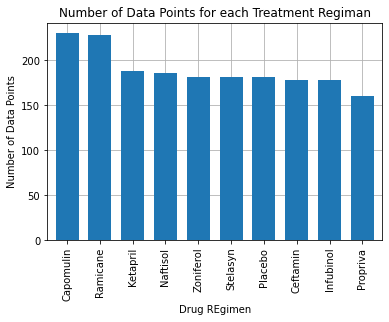

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar = clean_data["Drug Regimen"].value_counts().plot.bar(width= 0.7, zorder= 3)
bar.set_xlabel("Drug REgimen")
bar.set_ylabel("Number of Data Points")
bar.set_title("Number of Data Points for each Treatment Regiman")
bar.grid(zorder=0)

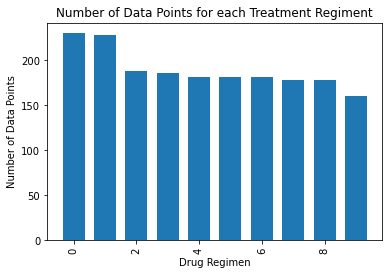

In [52]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_regimen = clean_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(count_regimen))
plt.bar(x_axis, count_regimen, width= 0.7, zorder= 3)
tick_location = [value for value in x_axis]
plt.xticks(rotation= 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for each Treatment Regiment")
plt.show()

Text(0, 0.5, '')

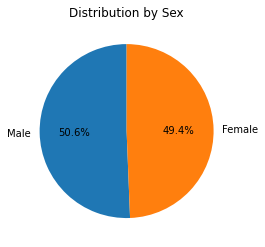

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_data["Sex"].value_counts()
pieplt = gender.plot.pie(autopct = "%1.1f%%", startangle= 90, title= "Distribution by Sex")
pieplt.set_ylabel("")

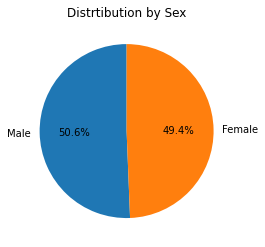

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = clean_data["Sex"].value_counts()
plt.pie(gender_count, labels= gender_count.index.values, autopct= "%1.1f%%", startangle= 90)
plt.title("Distrtibution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final = pd.DataFrame(clean_data.groupby("Mouse ID")["Timepoint"].max().sort_values().reset_index().rename(columns= {"Timeppoint": "max_timepoint"}))

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_data = pd.merge(clean_data, final, on= "Mouse ID")
new_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramican", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for x in treatments:

    drug_regimen = new_data.loc[new_data["Drug Regimen"]== x]
    final_vol = new_data.loc[new_data["Timepoint_x"]== new_data["Timepoint_y"]]
    values = final_vol["Tumor Volume (mm3)"]
    tumor_vol.append(values)

    quartiles = values.quantile([0.25, 0.5, 0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    inter = upper - lower
    print (f"IRQ for {x}: {inter}")
    low_bound = lower - (1.5*inter)
    up_bound = upper + (1.5*inter)
    print (f"Lower Bound for {x}: {low_bound}")
    print (f"Upper Bound for {x}: {up_bound}")
    outliers = (values.loc[(final_vol["Tumor Volume (mm3)"] >= up_bound) | (final_vol["Tumor Volume (mm3)"] <= low_bound)]).count()
    print (f"Number of {x} outliers: {outliers}")
    
    

IRQ for Capomulin: 19.022849680000007
Lower Bound for Capomulin: 17.400437649999986
Upper Bound for Capomulin: 93.49183637000002
Number of Capomulin outliers: 0
IRQ for Ramican: 19.022849680000007
Lower Bound for Ramican: 17.400437649999986
Upper Bound for Ramican: 93.49183637000002
Number of Ramican outliers: 0
IRQ for Infubinol: 19.022849680000007
Lower Bound for Infubinol: 17.400437649999986
Upper Bound for Infubinol: 93.49183637000002
Number of Infubinol outliers: 0
IRQ for Ceftamin: 19.022849680000007
Lower Bound for Ceftamin: 17.400437649999986
Upper Bound for Ceftamin: 93.49183637000002
Number of Ceftamin outliers: 0


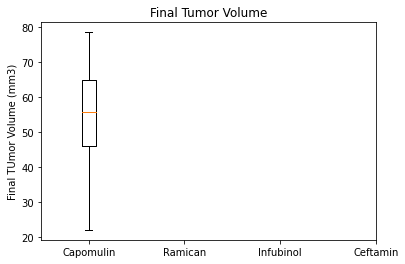

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplt = dict(marker="o", markerfacecolor= "r", markersize= 5, markeredgecolor= "black")
plt.boxplot(values, flierprops= boxplt)
plt.title("Final Tumor Volume")
plt.ylabel("Final TUmor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramican", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [58]:
capomulin = new_data.loc[new_data["Drug Regimen"] == "Capomulin"]
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45


Text(0.5, 1.0, 'Capomulin TReatment of Mouse')

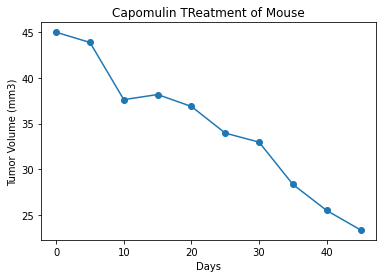

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = clean_data[clean_data["Mouse ID"] == "s185"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], marker= "o")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin TReatment of Mouse")

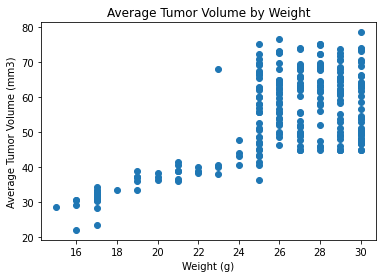

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regimen = new_data.loc[new_data["Drug Regimen"] == "Capomulin"]
avg_vol = pd.DataFrame(cap_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values().reset_index().rename(columns= {"Tumor Volume (mm3)": "avg_tumor_vol"}))
avg_vol = pd.merge(cap_regimen, avg_vol, on= "Mouse ID")
final_avg = avg_vol[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
final_avg
x_ = final_vol["Weight (g)"]
y_ = final_vol["Tumor Volume (mm3)"]
plt.scatter(x_, y_)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()

## Correlation and Regression

Correlation: 0.65


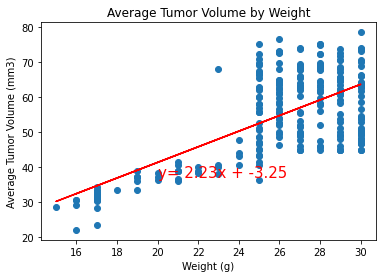

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ccap_regimen = new_data.loc[new_data["Drug Regimen"] == "Capomulin"]
avg_vol = pd.DataFrame(cap_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values().reset_index().rename(columns= {"Tumor Volume (mm3)": "avg_tumor_vol"}))
avg_vol = pd.merge(cap_regimen, avg_vol, on= "Mouse ID")
final_avg = avg_vol[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
final_avg
x_ = final_vol["Weight (g)"]
y_ = final_vol["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_,y_)
print(f"Correlation: {round(correlation[0], 2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_,y_)
regression = x_ * slope + intercept
equat = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_, y_)
plt.plot(x_, regression, "r-")
plt.annotate(equat, (20, 37), fontsize= 15, color= "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()

